<a href="https://colab.research.google.com/github/saiharshitha002/saiharshitha002/blob/main/air_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
df = pd.read_csv('/content/city_day.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
cols=df.columns
cols

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
cols_to_fill = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene','AQI']

In [ ]:
df['AQI_Bucket'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
city_wise_AQI = df[['City','AQI']].groupby(['City']).median().sort_values(['AQI']).reset_index()

In [ ]:
city_wise_AQI.head()

,City,AQI
0,Aizawl,23.0
1,Shillong,48.0
2,Thiruvananthapuram,68.0
3,Coimbatore,75.0
4,Amaravati,78.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

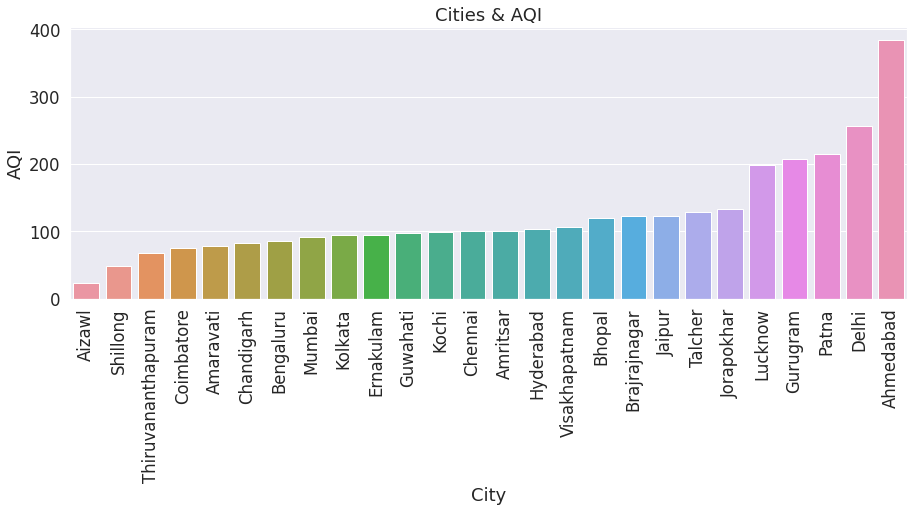

In [ ]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=city_wise_AQI).set(title ='Cities & AQI')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] =df['Date'].dt.month
df.drop('Date',axis=1,inplace=True)

In [ ]:
df['year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,1
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,1
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,1
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,1


In [ ]:
x1 = df[['City','AQI','year']].groupby(['City','year']).median().sort_values(['AQI']).reset_index()

In [ ]:
x1.head()

,City,year,AQI
0,Aizawl,2020,23.0
1,Shillong,2019,41.0
2,Amaravati,2020,54.0
3,Shillong,2020,55.0
4,Thiruvananthapuram,2017,62.0


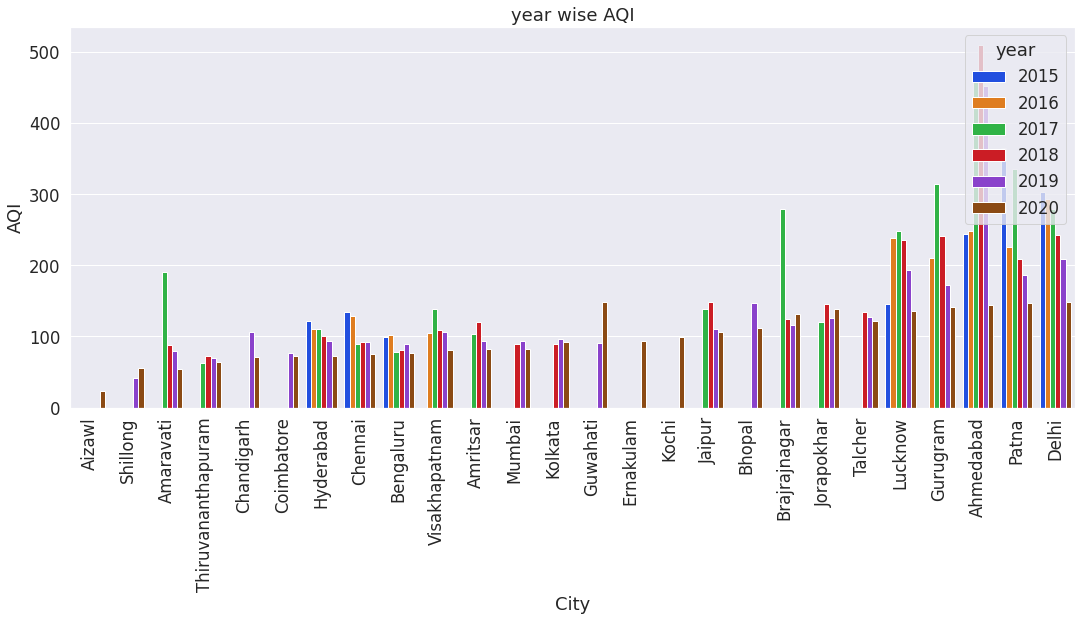

In [ ]:
plt.figure(figsize=(18,7))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=x1,hue='year',palette='bright').set(title ='year wise AQI')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head(2)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,1


In [ ]:
month_wise = df.groupby(['City','month']).agg(
    #month = pd.NamedAgg(column='month',aggfunc = max),
    AQI = pd.NamedAgg(column = 'AQI',aggfunc = np.mean))
month_wise.reset_index(inplace = True)

In [ ]:
month_wise.head()

,City,month,AQI
0,Ahmedabad,1,584.373626
1,Ahmedabad,2,637.277778
2,Ahmedabad,3,524.300000
3,Ahmedabad,4,402.955357
4,Ahmedabad,5,275.767241


In [ ]:
df[df['City']=='Ahmedabad'].sort_values('AQI',ascending=False).head()[['City','AQI']]

,City,AQI
1145,Ahmedabad,2049.0
1136,Ahmedabad,1917.0
560,Ahmedabad,1842.0
1048,Ahmedabad,1747.0
1463,Ahmedabad,1719.0


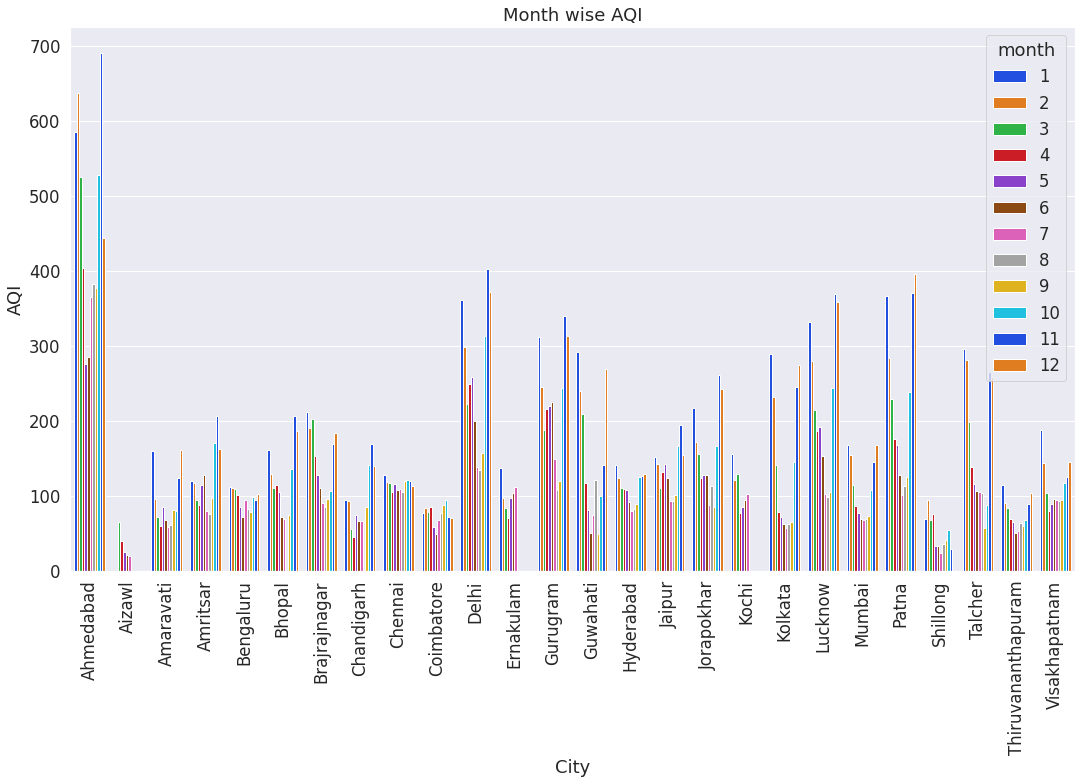

In [ ]:
plt.figure(figsize=(18,10))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=month_wise,hue='month',palette = 'bright').set(title ='Month wise AQI')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df1 = pd.read_csv('/content/IND_cities_geo_data.csv')

In [ ]:
df1.head()

,city,latitude,longitude,country
0,Abohar,30.1204,74.2900,India
1,Addanki,15.8110,79.9738,India
2,Adilabad,19.6667,78.5333,India
3,adoni,15.6300,77.2800,India
4,Agartala,23.8333,91.2667,India


In [ ]:
df_new = pd.merge(df, df1, how = 'left', left_on = 'City',right_on = 'city')

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29531 entries, 0 to 29530
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   PM2.5       24933 non-null  float64
 2   PM10        18391 non-null  float64
 3   NO          25949 non-null  float64
 4   NO2         25946 non-null  float64
 5   NOx         25346 non-null  float64
 6   NH3         19203 non-null  float64
 7   CO          27472 non-null  float64
 8   SO2         25677 non-null  float64
 9   O3          25509 non-null  float64
 10  Benzene     23908 non-null  float64
 11  Toluene     21490 non-null  float64
 12  Xylene      11422 non-null  float64
 13  AQI         24850 non-null  float64
 14  AQI_Bucket  24850 non-null  object 
 15  year        29531 non-null  int64  
 16  month       29531 non-null  int64  
 17  city        29531 non-null  object 
 18  latitude    29531 non-null  float64
 19  longitude   29531 non-nul

In [ ]:
C1 = df_new['City'].unique()
C2 = df_new['city'].unique()

In [ ]:
missing = []
for i in C1:
    if i not in C2:
        missing.append(i)

In [ ]:
missing

[]

In [ ]:
geo_data = df_new.groupby('City').agg(
aqi = pd.NamedAgg('AQI',np.mean),
lat = pd.NamedAgg('latitude',max),
lng = pd.NamedAgg('longitude',max)
).reset_index()


In [ ]:
geo_data.head()

,City,aqi,lat,lng
0,Ahmedabad,452.122939,23.0300,72.580
1,Aizawl,34.765766,23.7104,92.720
2,Amaravati,95.299643,20.9333,77.750
3,Amritsar,119.920959,31.6167,74.850
4,Bengaluru,94.318325,12.9699,77.598


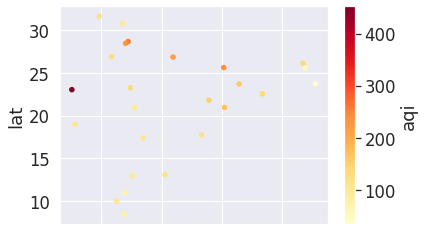

In [ ]:
geo_data.plot(x='lng',y='lat',kind = 'scatter',c='aqi',colormap = 'YlOrRd')

In [ ]:
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


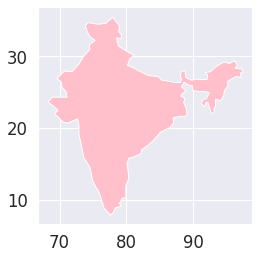

In [ ]:
countries[countries['name']=='India'].plot(color='pink')

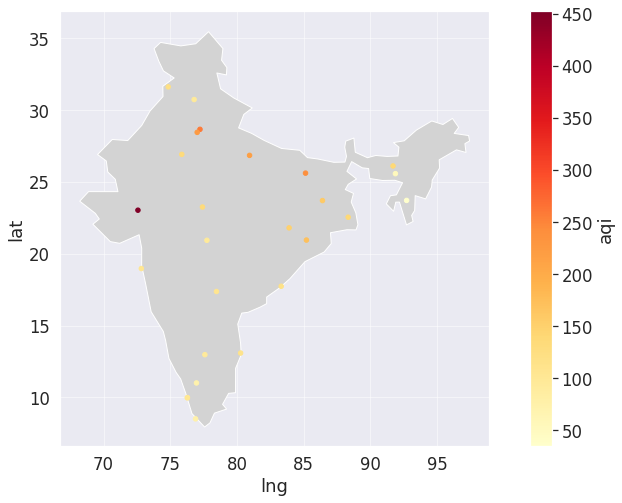

In [ ]:
fig,ax = plt.subplots(figsize = (15,8))
countries[countries['name']=='India'].plot(color='lightgrey',ax=ax)
geo_data.plot(x='lng',y='lat',kind = 'scatter',c='aqi',colormap = 'YlOrRd',ax=ax)
ax.grid(b=True,alpha=0.5)
plt.show()

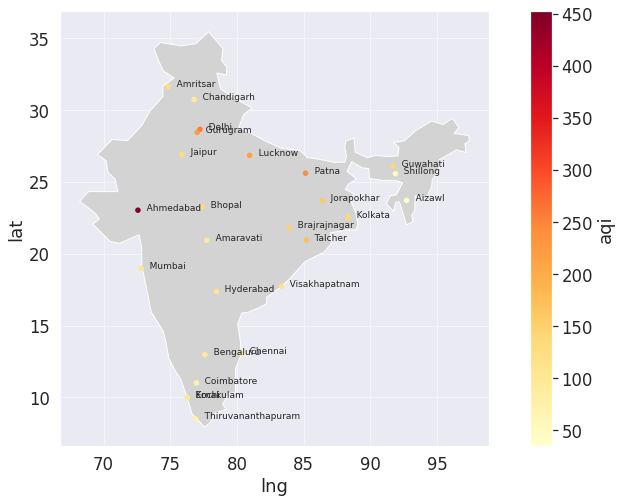

In [ ]:
fig,ax = plt.subplots(figsize = (15,8))
countries[countries['name']=='India'].plot(color='lightgrey',ax=ax)
geo_data.plot(x='lng',y='lat',kind = 'scatter',c='aqi',colormap = 'YlOrRd',ax=ax)

for idx, row in geo_data.iterrows():
    ax.annotate(str('   '+row['City']), (row['lng'], row['lat']),size=9 )
ax.grid(b=True,alpha=0.5)
plt.show()